In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
# Load the dataset
df = pd.read_csv('FinalBalancedDataset.csv')

# Preview the dataset
print(df.head())

# Separate features and labels
X = df['tweet']  # Features (tweets)
y = df['Toxicity']  # Labels (1 for toxic, 0 for non-toxic)

# Check the distribution of the classes
print(df['Toxicity'].value_counts())


   Unnamed: 0  Toxicity                                              tweet
0           0         0   @user when a father is dysfunctional and is s...
1           1         0  @user @user thanks for #lyft credit i can't us...
2           2         0                                bihday your majesty
3           3         0  #model   i love u take with u all the time in ...
4           4         0             factsguide: society now    #motivation
Toxicity
0    32592
1    24153
Name: count, dtype: int64


In [5]:
df.head(20)

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation
5,5,0,[2/2] huge fan fare and big talking before the...
6,6,0,@user camping tomorrow @user @user @user @use...
7,7,0,the next school year is the year for exams.ð...
8,8,0,we won!!! love the land!!! #allin #cavs #champ...
9,9,0,@user @user welcome here ! i'm it's so #gr...


In [93]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [94]:
# Initialize CountVectorizer for BoW
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data
X_train_bow = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_bow = vectorizer.transform(X_test)


In [95]:
# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# # Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = vectorizer.transform(X_test)


In [70]:
df

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation
...,...,...,...
56740,56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,56741,1,"you've gone and broke the wrong heart baby, an..."
56742,56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,56743,1,youu got wild bitches tellin you lies


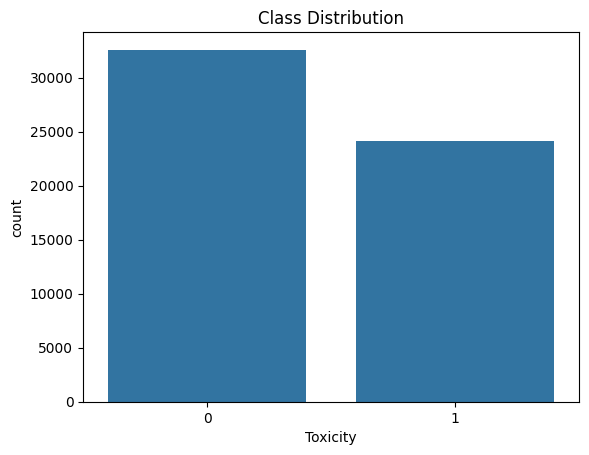

In [71]:
# Check class distribution
sns.countplot(x='Toxicity', data=df)
plt.title('Class Distribution')
plt.show()

Decision Trees

In [97]:
# Decision Tree with BoW
dt_bow = DecisionTreeClassifier(random_state=42)
dt_bow.fit(X_train_bow, y_train)
y_pred_dt_bow = dt_bow.predict(X_test_bow)

# Decision Tree with TF-IDF
dt_tfidf = DecisionTreeClassifier(random_state=42)
dt_tfidf.fit(X_train_tfidf, y_train)
y_pred_dt_tfidf = dt_tfidf.predict(X_test_tfidf)


Random Forest

In [15]:
# Random Forest with BoW
rf_bow = RandomForestClassifier(random_state=42)
rf_bow.fit(X_train_bow, y_train)
y_pred_rf_bow = rf_bow.predict(X_test_bow)

# Random Forest with TF-IDF
rf_tfidf = RandomForestClassifier(random_state=42)
rf_tfidf.fit(X_train_tfidf, y_train)
y_pred_rf_tfidf = rf_tfidf.predict(X_test_tfidf)


Naive Bayes

In [16]:
# Naive Bayes with BoW
nb_bow = MultinomialNB()
nb_bow.fit(X_train_bow, y_train)
y_pred_nb_bow = nb_bow.predict(X_test_bow)

# Naive Bayes with TF-IDF
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)
y_pred_nb_tfidf = nb_tfidf.predict(X_test_tfidf)


K-Nearest Neighbors

In [17]:
# K-NN with BoW
knn_bow = KNeighborsClassifier()
knn_bow.fit(X_train_bow, y_train)
y_pred_knn_bow = knn_bow.predict(X_test_bow)

# K-NN with TF-IDF
knn_tfidf = KNeighborsClassifier()
knn_tfidf.fit(X_train_tfidf, y_train)
y_pred_knn_tfidf = knn_tfidf.predict(X_test_tfidf)


Support Vector Machine

In [22]:
# SVM with BoW
svm_bow = SVC(probability=True, random_state=42)
svm_bow.fit(X_train_bow, y_train)
y_pred_svm_bow = svm_bow.predict(X_test_bow)




In [23]:
# SVM with TF-IDF
svm_tfidf = SVC(probability=True, random_state=42)
svm_tfidf.fit(X_train_tfidf, y_train)
y_pred_svm_tfidf = svm_tfidf.predict(X_test_tfidf)

Classification Report and Confusion Matrix

In [11]:
def evaluate_model(y_test, y_pred, model_name, feature_name):
    print(f"Evaluation Metrics for {model_name} using {feature_name}:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {model_name} ({feature_name})")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


Decision Tree with BoW

Evaluation Metrics for Decision Tree using Bag of Words:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      6472
           1       0.93      0.90      0.92      4877

    accuracy                           0.93     11349
   macro avg       0.93      0.93      0.93     11349
weighted avg       0.93      0.93      0.93     11349



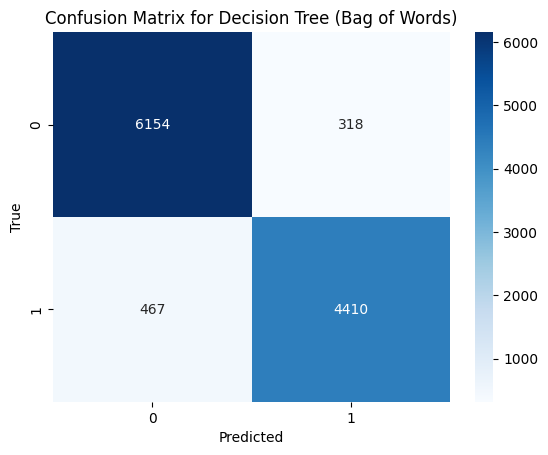

In [51]:
evaluate_model(y_test, y_pred_dt_bow, "Decision Tree", "Bag of Words")


Evaluation Metrics for Decision Tree using TF-IDF:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      6472
           1       0.92      0.91      0.92      4877

    accuracy                           0.93     11349
   macro avg       0.93      0.93      0.93     11349
weighted avg       0.93      0.93      0.93     11349



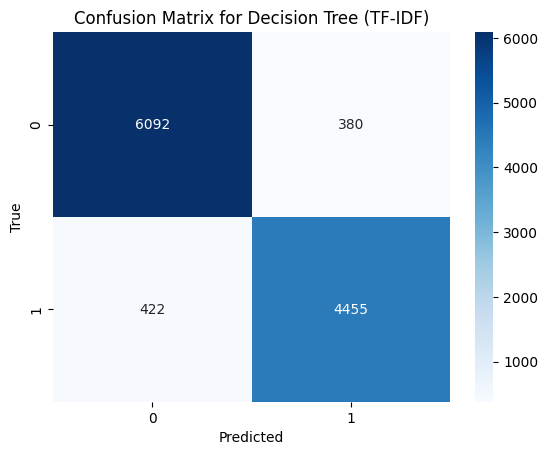

In [21]:
evaluate_model(y_test, y_pred_dt_tfidf, "Decision Tree", "TF-IDF")


ROC-AUC Curve

In [87]:
def plot_roc_auc(model, X_test, y_test, model_name, feature_name):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC-AUC Curve for {model_name} ({feature_name})')
    plt.legend(loc="lower right")
    plt.show()


#Decision Tree with BoW

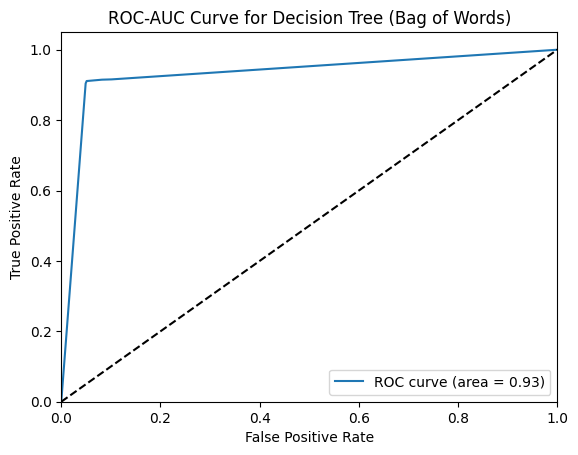

In [98]:
plot_roc_auc(dt_bow, X_test_bow, y_test, "Decision Tree", "Bag of Words")


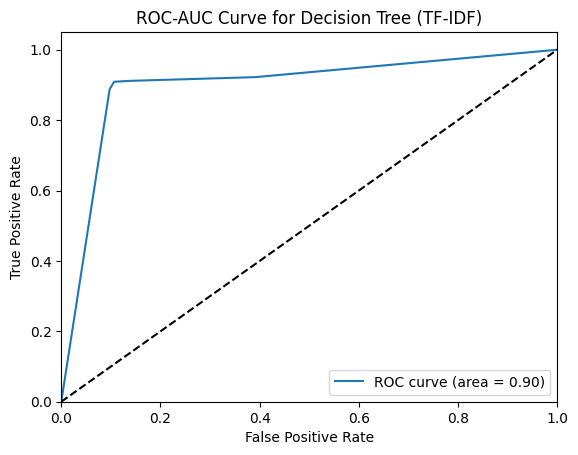

In [99]:
plot_roc_auc(dt_tfidf, X_test_bow, y_test, "Decision Tree", "TF-IDF")


Random Forest

Evaluation Metrics for Random Forest using Bag of Words:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      6472
           1       0.93      0.91      0.92      4877

    accuracy                           0.93     11349
   macro avg       0.93      0.93      0.93     11349
weighted avg       0.93      0.93      0.93     11349



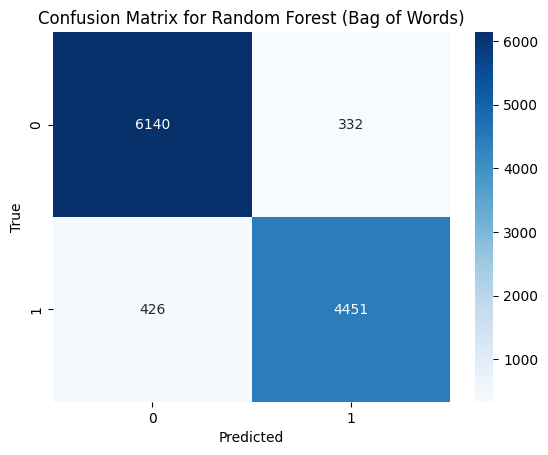

In [54]:
evaluate_model(y_test, y_pred_rf_bow, "Random Forest", "Bag of Words")


Evaluation Metrics for Random Forest using TF-IDF:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      6472
           1       0.93      0.92      0.92      4877

    accuracy                           0.93     11349
   macro avg       0.93      0.93      0.93     11349
weighted avg       0.93      0.93      0.93     11349



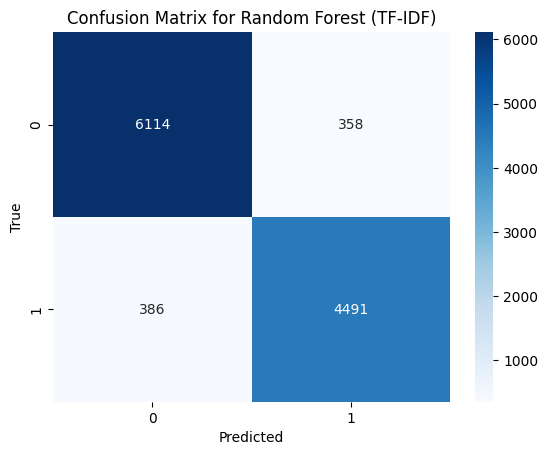

In [25]:
evaluate_model(y_test, y_pred_rf_tfidf, "Random Forest", "TF-IDF")


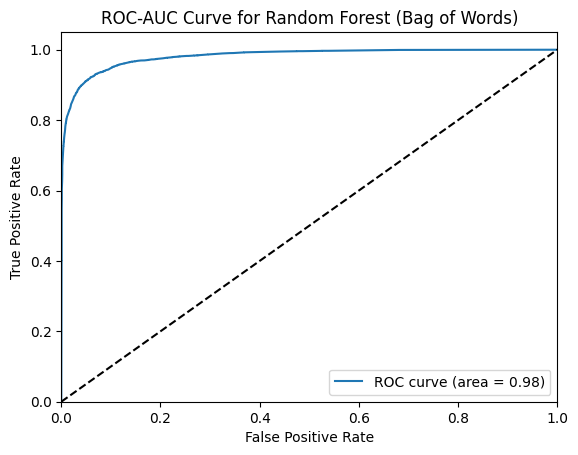

In [100]:
plot_roc_auc(rf_bow, X_test_bow, y_test, "Random Forest", "Bag of Words")


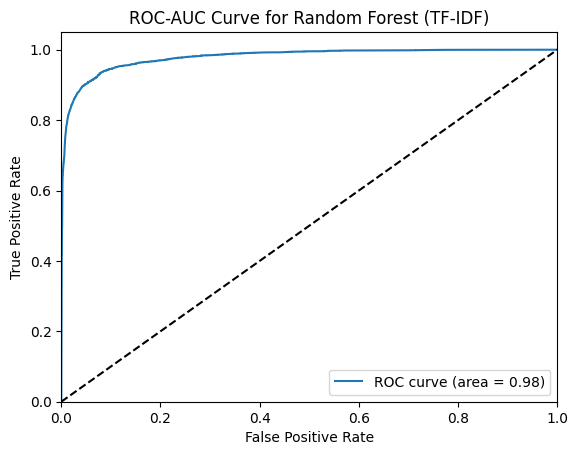

In [27]:
plot_roc_auc(rf_tfidf, X_test_bow, y_test, "Random Forest", "TF-IDF")


Navie Bayes

Evaluation Metrics for Navie Bayes using Bag of Words:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      6472
           1       0.89      0.93      0.91      4877

    accuracy                           0.92     11349
   macro avg       0.92      0.92      0.92     11349
weighted avg       0.92      0.92      0.92     11349



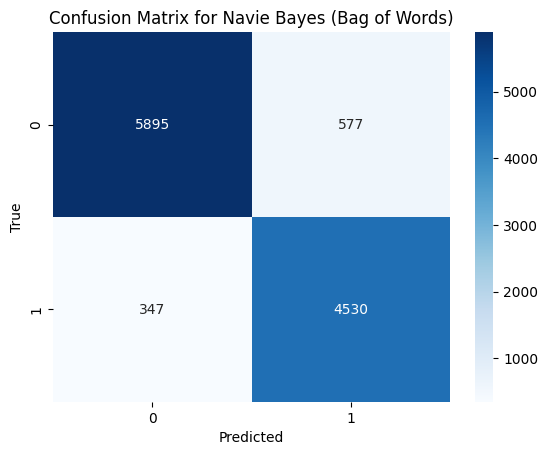

Evaluation Metrics for Navie Bayes using TF-IDF:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6472
           1       0.91      0.90      0.90      4877

    accuracy                           0.92     11349
   macro avg       0.92      0.92      0.92     11349
weighted avg       0.92      0.92      0.92     11349



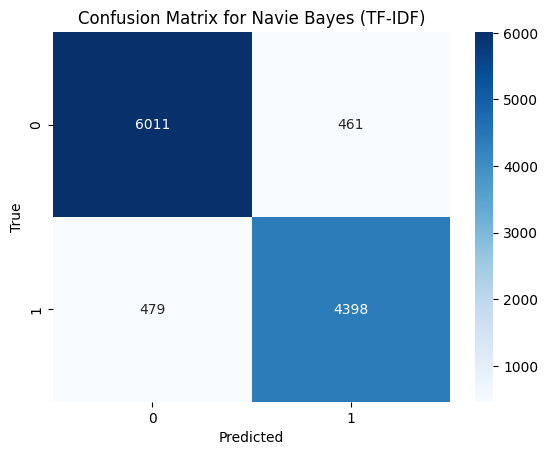

In [28]:
evaluate_model(y_test, y_pred_nb_bow, "Navie Bayes", "Bag of Words")
evaluate_model(y_test, y_pred_nb_tfidf, "Navie Bayes", "TF-IDF")




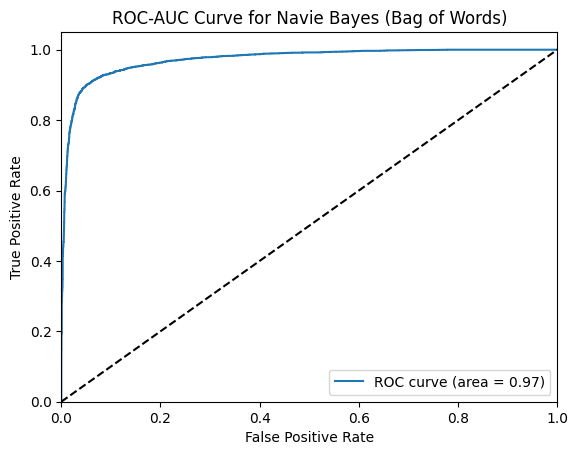

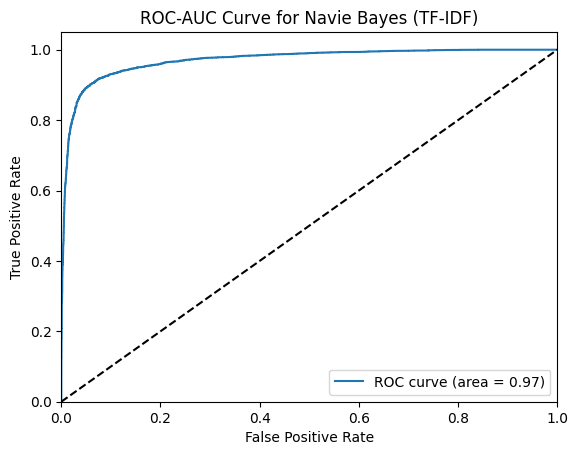

In [29]:
plot_roc_auc(nb_bow, X_test_bow, y_test, "Navie Bayes", "Bag of Words")
plot_roc_auc(nb_tfidf, X_test_bow, y_test, "Navie Bayes", "TF-IDF")




KNN

Evaluation Metrics for KNN using Bag of Words:
              precision    recall  f1-score   support

           0       0.84      0.98      0.91      6472
           1       0.97      0.76      0.85      4877

    accuracy                           0.88     11349
   macro avg       0.90      0.87      0.88     11349
weighted avg       0.90      0.88      0.88     11349



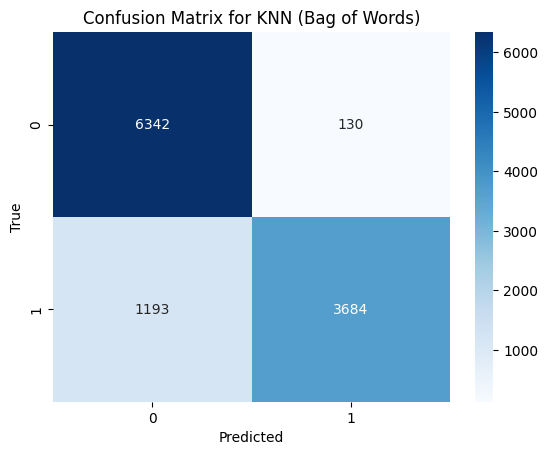

Evaluation Metrics for KNN using TF-IDF:
              precision    recall  f1-score   support

           0       0.61      0.99      0.76      6472
           1       0.93      0.16      0.27      4877

    accuracy                           0.63     11349
   macro avg       0.77      0.58      0.51     11349
weighted avg       0.75      0.63      0.55     11349



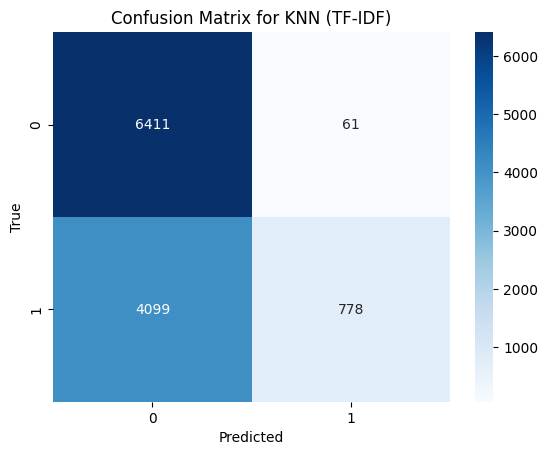

In [30]:
evaluate_model(y_test, y_pred_knn_bow, "KNN", "Bag of Words")
evaluate_model(y_test, y_pred_knn_tfidf, "KNN", "TF-IDF")




In [ ]:
# plot_roc_auc(knn_bow, X_test_bow, y_test, "KNN", "Bag of Words")
# plot_roc_auc(knn_tfidf, X_test_bow, y_test, "KNN", "TF-IDF")

SVM

Evaluation Metrics for SVM using Bag of Words:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6472
           1       0.96      0.90      0.93      4877

    accuracy                           0.94     11349
   macro avg       0.95      0.94      0.94     11349
weighted avg       0.94      0.94      0.94     11349



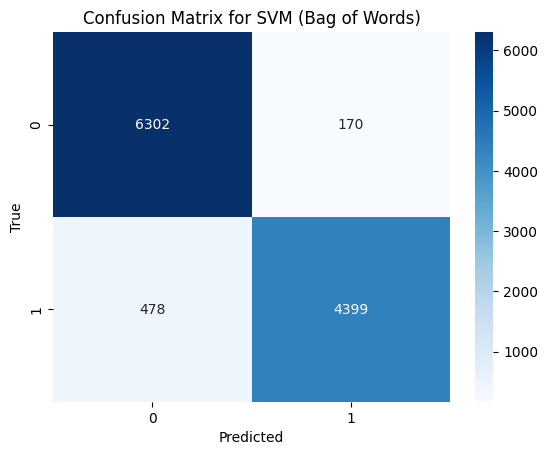

Evaluation Metrics for SVM using TF-IDF:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6472
           1       0.96      0.91      0.93      4877

    accuracy                           0.94     11349
   macro avg       0.95      0.94      0.94     11349
weighted avg       0.94      0.94      0.94     11349



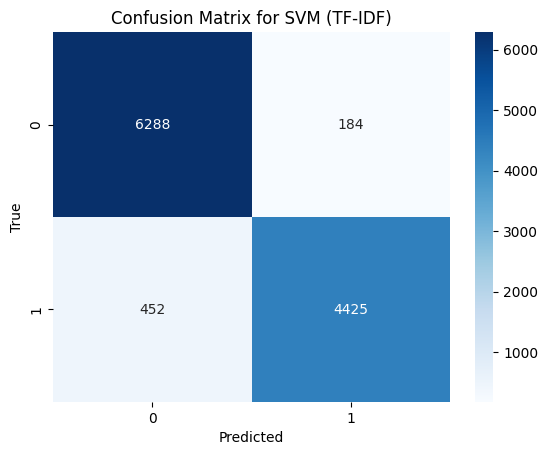

In [33]:
evaluate_model(y_test, y_pred_svm_bow, "SVM", "Bag of Words")
evaluate_model(y_test, y_pred_svm_tfidf, "SVM", "TF-IDF")

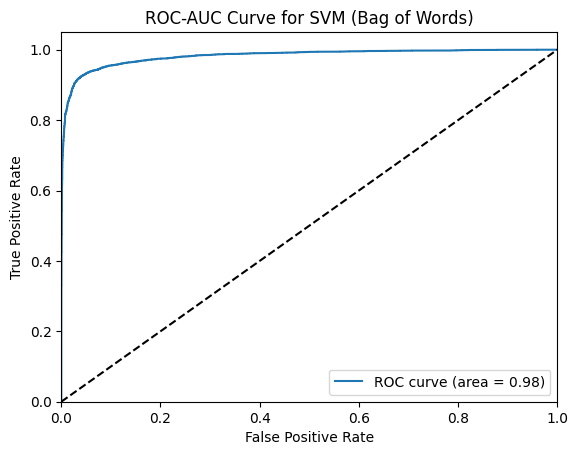

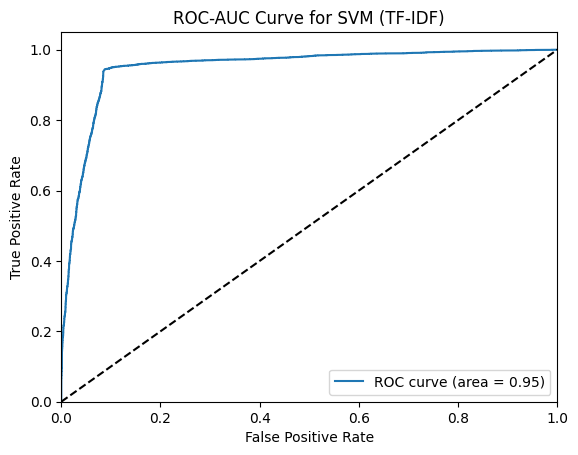

In [34]:
plot_roc_auc(svm_bow, X_test_bow, y_test, "SVM", "Bag of Words")
plot_roc_auc(svm_tfidf, X_test_bow, y_test, "SVM", "TF-IDF")


